### Método de Remuestreo K-fold Cross Validation

El método de K-fold cross validation permite ajustar repetidamente un modelo en diferentes partes del conjunto de entrenamiento y probar su rendimiento en otras partes del mismo conjunto.
#### K-fold Cross Validation
Es el remuestreo estándar de la industria para estudiar el rendimiento futuro del modelo.

**Pasos del K-fold Cross Validation**:

1. **División de los Datos**:
   - Divide aleatoriamente los datos de entrenamiento en \( K \) grupos del mismo tamaño (aproximadamente).
   
2. **Ajuste del Modelo**:
   - Ajusta el modelo utilizando \( K-1 \) grupos, es decir, todos menos uno. El grupo restante (grupo de validación) se utiliza para calcular el rendimiento del modelo.
   
3. **Rotación del Conjunto de Validación**:
   - En las siguientes repeticiones, un grupo diferente se trata como conjunto de validación. Esto significa que cada grupo se utilizará una vez como conjunto de validación.
   
4. **Cálculo del Error de Generalización**:
   - Promedia las (k) estimaciones del error de generalización (e_1, e_2, e_3, ... e_k ), que es la diferencia entre el valor predicho y el observado.
   - Este método proporciona una aproximación del error para los datos no observados.


- En general, se dice que con \( K > 10 \), se alcanzan resultados similares al caso extremo en que el número de folds es igual al número de observaciones en los datos (\( K=n \)), llamado leave-one-out CV (LOOCV).

- Es útil realizar el procedimiento de K-fold cross validation repetidamente, es decir, varios K-fold cross validations, para que la distribución de los valores de la variable objetivo en los folds sea lo más representativa posible de la data original. Este método ayuda a aumentar la precisión del error de generalización estimado.

- Aunque un \( K \) mayor o igual a 10 minimiza la variabilidad del rendimiento estimado, K-fold CV tiende a tener una mayor variabilidad que el bootstrapping.

### Método de Remuestreo: Bootstrapping

### Muestra Aleatoria con Reemplazo
En bootstrapping, se toman múltiples muestras aleatorias con reemplazo del conjunto de datos de entrenamiento. Esto significa que cada muestra (bootstrap sample) puede tener filas repetidas y algunas filas pueden no estar presentes. Cada muestra tiene el mismo tamaño que el conjunto de datos original.

### Filas Out-of-Bag (OOB)
Las observaciones que no se incluyen en una muestra particular se denominan filas out-of-bag (OOB). Estas filas se utilizan para evaluar el rendimiento del modelo. **(conjunto de validación)**

### Proceso de Bootstrapping
El proceso de bootstrapping para evaluar el rendimiento de un modelo incluye los siguientes pasos:

1. **Generación de Muestras de Bootstrap**: Se generan múltiples muestras de bootstrap a partir del conjunto de datos de entrenamiento.
2. **Entrenamiento del Modelo**: Para cada muestra de bootstrap, se entrena un modelo.
3. **Evaluación con Filas OOB**: Se evalúa el rendimiento del modelo utilizando las filas OOB correspondientes a esa muestra de bootstrap. **(conjunto de validación)**
4. **Promedio de Evaluaciones**: Se repite el proceso múltiples veces y se promedian las evaluaciones para obtener una estimación del rendimiento del modelo.


**División Inicial de Datos**: Se divide el conjunto de datos original en conjunto de entrenamiento y conjunto de prueba mediante muestreo aleatorio simple o estratificado.

**Generación de Muestras de Bootstrap**:
- Supongamos que el conjunto de entrenamiento tiene 8000 filas.
- Se genera la primera muestra de bootstrap tomando 8000 filas aleatorias con reemplazo del conjunto de entrenamiento. Algunas filas pueden repetirse y otras pueden faltar (OOB).
- Se repite este proceso para generar múltiples muestras de bootstrap (e.g., 1000 muestras).

**Entrenamiento del Modelo**:
- Para cada muestra de bootstrap, se entrena un modelo usando solo las filas dentro de esa muestra.

**Evaluación con Filas OOB**:
- Para cada modelo entrenado, se utiliza el conjunto de filas OOB para evaluar el rendimiento del modelo.
- Dado que las filas OOB no se utilizaron para entrenar el modelo, proporcionan una estimación independiente del rendimiento del modelo, similar a cómo funcionan los conjuntos de validación en el método k-fold CV.
- Se calculan métricas de rendimiento (e.g., error cuadrático medio, precisión, recall) comparando las predicciones del modelo con los valores observados en las filas OOB.

**Promedio de Evaluaciones**:
- Se repite el proceso de entrenamiento y evaluación para todas las muestras de bootstrap.
- Se promedian las métricas de rendimiento obtenidas de todas las evaluaciones con filas OOB para obtener una estimación final del rendimiento del modelo.

### Consideraciones
- **Tamaño del Conjunto de Datos**: Bootstrapping puede ser problemático en conjuntos de datos más pequeños porque las filas repetidas y faltantes son más relevantes, lo que puede inducir a errores mayores de predicción.

### Detalle sobre Variabilidad y Sesgo en Bootstrapping y K-fold Cross-Validation

**Contexto y Definiciones**:
- **Variabilidad**: Se refiere a cuánto varían las estimaciones del modelo cuando se entrenan en diferentes subconjuntos de datos. Alta variabilidad significa que las predicciones del modelo pueden cambiar considerablemente con diferentes muestras de datos.
- **Sesgo**: Es el error sistemático introducido por un modelo que no puede captar la complejidad de los datos. Un alto sesgo significa que el modelo hace suposiciones simplistas y no se ajusta bien a los datos.

**Explicación del Bootstrapping**:
- **Muestra Aleatoria con Reemplazo**:
  - En bootstrapping, se generan múltiples muestras de bootstrap del conjunto de datos de entrenamiento original.
  - Cada muestra de bootstrap se selecciona con reemplazo, lo que significa que algunas filas pueden aparecer múltiples veces en la misma muestra, mientras que otras filas pueden no aparecer en absoluto.
- **Menor Variabilidad**:
  - Debido a que cada muestra de bootstrap es una variación del conjunto de datos de entrenamiento original con algunas filas duplicadas, las muestras tienden a ser menos diversas comparadas con los folds en k-fold CV.
  - Esto significa que las muestras de bootstrap pueden ser más similares entre sí, lo que lleva a una menor variabilidad en las estimaciones del modelo. En otras palabras, los modelos entrenados en diferentes muestras de bootstrap tienden a producir predicciones más consistentes.
- **Mayor Sesgo**:
  - La duplicación de filas y la ausencia de algunas filas en cada muestra de bootstrap pueden introducir un sesgo en la medida del error.
  - Esto ocurre porque las muestras de bootstrap no son completamente representativas del conjunto de datos original debido a la repetición de algunas filas y la exclusión de otras. Como resultado, el modelo puede estar ajustado a un subconjunto menos diverso de datos, lo que lleva a un mayor sesgo en las estimaciones del error.

**Comparación con k-fold Cross-Validation**:
- **Muestra Aleatoria sin Reemplazo**:
  - En k-fold CV, el conjunto de datos de entrenamiento se divide en \( k \) partes (folds o carpetas) de manera que cada fold es aproximadamente del mismo tamaño y las divisiones no se superponen.
  - Cada fold se utiliza una vez como conjunto de validación, mientras que los \( k-1 \) folds restantes se utilizan como conjunto de entrenamiento.
- **Mayor Variabilidad**:
  - Debido a que cada fold de validación en k-fold CV es único y no contiene duplicados, las diferentes combinaciones de datos de entrenamiento y validación tienden a ser más diversas.
  - Esto introduce una mayor variabilidad en las estimaciones del modelo, ya que cada fold proporciona una vista diferente de los datos. Los modelos entrenados en diferentes combinaciones de folds pueden producir predicciones más variadas.
- **Menor Sesgo**:
  - La ausencia de duplicación y la inclusión de todas las filas en algún punto del proceso de validación en k-fold CV hacen que las estimaciones del modelo sean menos sesgadas.
  - Cada fold de validación es una representación más fiel del conjunto de datos original. Esto reduce el sesgo en las estimaciones del error, proporcionando una medida más precisa del rendimiento del modelo.

**Ejemplo Ilustrativo**:
Imaginemos un conjunto de datos con 10 observaciones: A, B, C, D, E, F, G, H, I, J.

- **Bootstrapping**:
  - Muestra de Bootstrap 1: A, B, B, D, E, F, F, H, I, J (observaciones B y F repetidas; C y G faltantes).
  - Muestra de Bootstrap 2: A, A, C, D, E, G, H, I, I, J (observaciones A e I repetidas; B y F faltantes).

- **k-fold Cross-Validation (k=5)**:
  - Fold 1: (A, B) (entrenamiento); (C, D, E, F, G, H, I, J) (validación).
  - Fold 2: (C, D) (entrenamiento); (A, B, E, F, G, H, I, J) (validación).

En bootstrapping, algunas observaciones están repetidas y otras faltan, lo que reduce la diversidad entre las muestras y aumenta el sesgo. En k-fold CV, cada fold es una representación más única y completa del conjunto de datos, lo que aumenta la variabilidad y reduce el sesgo.

### Método de Remuestreo Jackknife

El método de remuestreo Jackknife es una técnica estadística utilizada para estimar la variabilidad de un estimador, como la media o la varianza. Este método es particularmente útil para evaluar el sesgo y la varianza de los estimadores en muestras pequeñas. A continuación, se detalla el método, se proporciona un ejemplo, se discuten sus pros y contras, se explica la matemática/estadística subyacente y se compara con los métodos de K-fold Cross Validation y Bootstrapping.

### Proceso del Método Jackknife

El método Jackknife se basa en la eliminación sistemática de una observación a la vez del conjunto de datos y en el cálculo del estimador en cada subconjunto de datos resultante. Los pasos generales son los siguientes:

### División Inicial

Supongamos que tenemos un conjunto de datos con $n$ observaciones.

### Generación de Submuestras

Se crean $n$ submuestras, cada una de las cuales contiene $n-1$ observaciones. Cada submuestra se forma eliminando una observación diferente del conjunto de datos original.

### Cálculo del Estimador

Para cada submuestra, se calcula el estimador de interés (e.g., media, varianza).

### Cálculo del Estimador Jackknife

Se promedian los estimadores calculados para obtener una estimación del sesgo y la varianza del estimador original.

### Ejemplo de Aplicación del Método Jackknife

Supongamos que tenemos un conjunto de datos con 5 observaciones: [10, 20, 30, 40, 50].

### Paso 1: Generación de Submuestras

- Submuestra 1: [20, 30, 40, 50] (eliminamos la primera observación)
- Submuestra 2: [10, 30, 40, 50] (eliminamos la segunda observación)
- Submuestra 3: [10, 20, 40, 50] (eliminamos la tercera observación)
- Submuestra 4: [10, 20, 30, 50] (eliminamos la cuarta observación)
- Submuestra 5: [10, 20, 30, 40] (eliminamos la quinta observación)

### Paso 2: Cálculo del Estimador (Media)

- Media de la submuestra 1: $\frac{20 + 30 + 40 + 50}{4} = 35$
- Media de la submuestra 2: $\frac{10 + 30 + 40 + 50}{4} = 32.5$
- Media de la submuestra 3: $\frac{10 + 20 + 40 + 50}{4} = 30$
- Media de la submuestra 4: $\frac{10 + 20 + 30 + 50}{4} = 27.5$
- Media de la submuestra 5: $\frac{10 + 20 + 30 + 40}{4} = 25$

### Paso 3: Cálculo del Estimador Jackknife

- Media de todas las medias: $\frac{35 + 32.5 + 30 + 27.5 + 25}{5} = 30$

Varianza Jackknife:
$$
Var(\hat{\theta}) = \frac{n-1}{n} \sum_{i=1}^{n} (\hat{\theta}_i - \bar{\theta})^2
$$
donde $\hat{\theta}_i$ es la media de cada submuestra y $\bar{\theta}$ es la media de todas las medias.

### Pros y Contras del Método Jackknife

### Pros:

- **Simplicidad**: Fácil de implementar y entender.
- **Sesgo Reducido**: Ofrece una buena estimación del sesgo del estimador.
- **Eficiencia Computacional**: Menos intensivo computacionalmente en comparación con el bootstrapping.

### Contras:

- **Subestimación de la Varianza**: Puede subestimar la varianza del estimador en muestras pequeñas.
- **Sensibilidad a Outliers**: Es sensible a la presencia de outliers en el conjunto de datos.

### Matemática/Estadística Subyacente

El método Jackknife se basa en la idea de eliminar una observación a la vez y calcular el estimador de interés en cada subconjunto resultante. La fórmula de la varianza Jackknife es:

$$
Var(\hat{\theta}) = \frac{n-1}{n} \sum_{i=1}^{n} (\hat{\theta}_i - \bar{\theta})^2
$$

donde $n$ es el número total de observaciones, $\hat{\theta}_i$ es el estimador calculado en la $i$-ésima submuestra, y $\bar{\theta}$ es la media de todos los $\hat{\theta}_i$.

### Comparación de Jackknife con K-fold Cross Validation y Bootstrapping

### Jackknife vs. K-fold Cross Validation:

- **Enfoque**: Jackknife elimina una observación a la vez, mientras que K-fold CV divide los datos en $k$ grupos.
- **Variabilidad**: K-fold CV puede proporcionar una mejor estimación de la variabilidad del modelo, ya que utiliza múltiples divisiones.
- **Uso**: K-fold CV es más adecuado para evaluar el rendimiento predictivo de los modelos de machine learning, mientras que Jackknife se utiliza más para estimar el sesgo y la varianza de los estimadores.

### Jackknife vs. Bootstrapping:

- **Enfoque**: Bootstrapping genera múltiples muestras con reemplazo, mientras que Jackknife elimina una observación a la vez.
- **Variabilidad y Sesgo**: Bootstrapping tiende a proporcionar una mejor estimación de la variabilidad del modelo, mientras que Jackknife es más sencillo y menos intensivo computacionalmente.
- **Precisión**: Bootstrapping generalmente proporciona estimaciones más precisas de la varianza y el sesgo, especialmente en muestras pequeñas.


El método Jackknife es una técnica de remuestreo útil para estimar la variabilidad y el sesgo de un estimador, especialmente en conjuntos de datos más pequeños. Aunque tiene algunas limitaciones, su simplicidad y eficiencia computacional lo hacen una herramienta valiosa en el análisis estadístico. Comparado con K-fold Cross Validation y Bootstrapping, el Jackknife es menos intensivo computacionalmente pero puede subestimar la varianza en muestras pequeñas y es más sensible a outliers.

### Comparativa Detallada entre K-fold Cross Validation, Bootstrapping y Jackknife


En el contexto de machine learning, los métodos de remuestreo son fundamentales para entrenar los modelos. Tres de estos metodos son K-fold Cross Validation, Bootstrapping y Jackknife. A continuación, se presenta una comparativa detallada de estos métodos, considerando aspectos como varianza, sesgo, precisión, eficiencia computacional, iteraciones, muestras, filas u observaciones del conjunto de validación y conjunto de entrenamiento.

### K-fold Cross Validation

### Descripción

K-fold Cross Validation (CV) divide el conjunto de datos en $k$ grupos (folds) de tamaño aproximadamente igual. El proceso implica entrenar el modelo $k$ veces, cada vez utilizando $k-1$ folds para entrenamiento y el fold restante para validación.

### Parámetros

- **Número de folds (k)**: Típicamente se usa $k = 5$ o $k = 10$.

### Ventajas

- **Varianza**: Proporciona una buena estimación de la variabilidad del modelo ya que utiliza múltiples divisiones.
- **Sesgo**: Tiende a tener un sesgo bajo debido al uso de múltiples folds.
- **Precisión**: Ofrece una estimación precisa del rendimiento del modelo.
- **Simplicidad**: Relativamente fácil de implementar y entender.
- **Conjunto de Entrenamiento y Validación**: Utiliza $\frac{k-1}{k}$ del conjunto de datos para entrenamiento y $\frac{1}{k}$ para validación en cada iteración.

### Desventajas

- **Eficiencia Computacional**: Más intensivo computacionalmente que el Jackknife debido a las múltiples iteraciones.
- **Iteraciones**: Requiere $k$ iteraciones, lo que puede ser costoso para valores grandes de $k$.

### Bootstrapping

### Descripción

Bootstrapping genera múltiples muestras con reemplazo del conjunto de datos original. Cada muestra de bootstrap se utiliza para entrenar el modelo y las observaciones no incluidas (out-of-bag) se utilizan para la validación.

### Parámetros

- **Número de muestras (n\_bootstraps)**: Número de muestras bootstrap generadas, comúnmente 1000.

### Ventajas

- **Varianza**: Proporciona una excelente estimación de la variabilidad del modelo, especialmente en muestras pequeñas.
- **Sesgo**: Puede proporcionar una buena estimación del sesgo del modelo.
- **Precisión**: Generalmente ofrece estimaciones más precisas de la varianza y el sesgo.
- **Simplicidad**: Sencillo de implementar y entender.

### Desventajas

- **Eficiencia Computacional**: Muy intensivo computacionalmente debido a la generación de múltiples muestras y el entrenamiento repetido.
- **Iteraciones**: Requiere un gran número de iteraciones, lo que aumenta el costo computacional.
- **Conjunto de Entrenamiento y Validación**: Cada muestra contiene $n$ observaciones con reemplazo y las filas out-of-bag se utilizan para validación.

### Jackknife

### Descripción

El método Jackknife elimina sistemáticamente una observación a la vez del conjunto de datos y calcula el estimador en cada subconjunto resultante.

### Parámetros

- **Número de submuestras**: Igual al número de observaciones ($n$).

### Ventajas

- **Varianza**: Puede subestimar la varianza del estimador en muestras pequeñas.
- **Sesgo**: Ofrece una buena estimación del sesgo del estimador.
- **Precisión**: Menos preciso en estimar la varianza comparado con bootstrapping.
- **Simplicidad**: Muy fácil de implementar y entender.
- **Eficiencia Computacional**: Menos intensivo computacionalmente comparado con bootstrapping y, en algunos casos, K-fold CV.

### Desventajas

- **Varianza**: Subestima la varianza en muestras pequeñas.
- **Sensibilidad a Outliers**: Sensible a la presencia de outliers.
- **Iteraciones**: Realiza $n$ iteraciones, lo que puede ser costoso en conjuntos de datos grandes.
- **Conjunto de Entrenamiento y Validación**: Cada iteración entrena con $n-1$ observaciones y valida con 1 observación.

### Comparativa

### Varianza

- **K-fold CV**: Proporciona una buena estimación de la variabilidad debido a las múltiples divisiones.
- **Bootstrapping**: Excelente estimación de la variabilidad, especialmente en muestras pequeñas.
- **Jackknife**: Puede subestimar la variabilidad en muestras pequeñas.

### Sesgo

- **K-fold CV**: Sesgo bajo debido al uso de múltiples folds.
- **Bootstrapping**: Proporciona una buena estimación del sesgo.
- **Jackknife**: Ofrece una buena estimación del sesgo.

### Precisión

- **K-fold CV**: Estimación precisa del rendimiento del modelo.
- **Bootstrapping**: Ofrece estimaciones más precisas de la varianza y el sesgo.
- **Jackknife**: Menos preciso en estimar la varianza comparado con bootstrapping.

### Simplicidad

- **K-fold CV**: Relativamente fácil de implementar y entender.
- **Bootstrapping**: Sencillo de implementar y entender.
- **Jackknife**: Muy fácil de implementar y entender.

### Eficiencia Computacional

- **K-fold CV**: Más intensivo computacionalmente que Jackknife.
- **Bootstrapping**: Muy intensivo computacionalmente.
- **Jackknife**: Menos intensivo computacionalmente comparado con bootstrapping y, en algunos casos, K-fold CV.

### Iteraciones

- **K-fold CV**: Requiere $k$ iteraciones.
- **Bootstrapping**: Requiere un gran número de iteraciones ($n_{\text{bootstraps}}$).
- **Jackknife**: Realiza $n$ iteraciones.

### Conjunto de Entrenamiento y Validación

- **K-fold CV**: Utiliza $\frac{k-1}{k}$ del conjunto de datos para entrenamiento y $\frac{1}{k}$ para validación en cada iteración.
- **Bootstrapping**: Cada muestra contiene $n$ observaciones con reemplazo y las filas out-of-bag se utilizan para validación.
- **Jackknife**: Cada iteración entrena con $n-1$ observaciones y valida con 1 observación.

### Conclusiones respecto a la comparativa

Cada método de remuestreo tiene sus propias ventajas y desventajas, y la elección del método adecuado depende del contexto y de los objetivos específicos del análisis. K-fold Cross Validation es generalmente preferido para evaluar el rendimiento predictivo de los modelos de machine learning debido a su equilibrio entre varianza y sesgo. Bootstrapping es ideal para estimaciones precisas de la varianza y el sesgo, especialmente en muestras pequeñas, aunque es más intensivo computacionalmente. Jackknife, por otro lado, es muy fácil de implementar y es menos intensivo computacionalmente, pero puede subestimar la varianza en muestras pequeñas y es sensible a los outliers.

### Objetivos y Alcances

#### Objetivos

1. Implementar el método de remuestreo Jackknife para evaluar el rendimiento de un modelo de regresión lineal.
2. Comprobar la variabilidad, el sesgo y la varianza del estimador utilizando el dataset de gasto en publicidad y ventas.
3. Comparar el método Jackknife con otros métodos de remuestreo como K-fold Cross Validation y Bootstrapping.
4. Analizar la subestimación de la varianza en muestras pequeñas y comparar la eficiencia computacional de los métodos.
5. Evaluar y comparar las métricas de rendimiento y su precisión entre los métodos de remuestreo.

#### Alcances

1. Cargar y explorar el dataset de gasto en publicidad y ventas.
2. Dividir los datos en conjunto de entrenamiento y prueba.
3. Aplicar el método Jackknife para estimar la variabilidad, el sesgo y la varianza del modelo de regresión lineal.
4. Evaluar el modelo utilizando métricas como RMSE, MAE, correlación y r^2
5. Comparar los resultados obtenidos con los métodos K-fold Cross Validation y Bootstrapping.
6. Analizar la eficiencia computacional de cada método de remuestreo.
7. Explicar y demostrar el proceso paso a paso, incluyendo el cálculo de métricas de rendimiento, variabilidad y tiempo de ejecución.

### Base de Datos Utilizada: Advertising Sales Dataset
https://www.kaggle.com/datasets/yasserh/advertising-sales-dataset/

En la página del dataset se informa claramente que los valores de las columnas de tv ad budget, radio ad budget y Newspaper ad budget estan en escala de miles de dolares, y que a su vez los valores de la columna sales, estan en escala de millones de dolares.

Cargo las librerias necesarias para trabajar


In [ ]:
# Librerías necesarias
library(dplyr)
library(readr)
library(ggplot2)
library(caret)
library(rsample)
#Para medir el tiempo de ejecución
library(microbenchmark)

Cargo el dataset de gasto en publicidad y ventas, para verificar su contenido inicial.

In [2]:
# Cargar el dataset
base_publicidad <- read.csv("Advertising Budget and Sales.csv")
# Ver los primeros registros del dataset
head(base_publicidad)

,X,TV.Ad.Budget....,Radio.Ad.Budget....,Newspaper.Ad.Budget....,Sales....
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,230.1,37.8,69.2,22.1
2,2,44.5,39.3,45.1,10.4
3,3,17.2,45.9,69.3,9.3
4,4,151.5,41.3,58.5,18.5
5,5,180.8,10.8,58.4,12.9
6,6,8.7,48.9,75.0,7.2


- Esta base de datos contiene datos sobre los presupuestos de publicidad en TV, radio y periódicos, y las correspondientes ventas.
- Con `head` obtengo una vista previa rápida de la estructura de los datos y verifico que la carga se realizó correctamente.
- Sin embargo observo que existe una columna llamada "X" que no aporta ninguna información, y que es solo la enumeración de las observaciones, por lo que proceso a eliminarla.

In [3]:
# elimino la columna X dado que no aporta información
base_publicidad$X <- NULL
head(base_publicidad)

,TV.Ad.Budget....,Radio.Ad.Budget....,Newspaper.Ad.Budget....,Sales....
,<dbl>,<dbl>,<dbl>,<dbl>
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2


Y con eso queda comprobado que se eliminó la columna X, pero para efectos de simplicidad, es mejor cambiar el formato del nombre de las columnas, asi que procedo a hacerlo.

In [4]:
#cambio los nombre de las columnas
colnames(base_publicidad) <- c("tv_ad_budget", "radio_ad_budget",
                               "newspaper_ad_budget", "sales")
# reviso nuevamente los primeros registros
head(base_publicidad)

,tv_ad_budget,radio_ad_budget,newspaper_ad_budget,sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2


Y en efecto, ahora tengo la base de datos con las columnas bien nombradas, pero lo último eso si sería cambiar las escalas de:
- Las 3 columnas independientes (tv_ad_budget, radio_ad_budget, newspaper_ad_budget) que estan actualmente en miles de dolares, la idea es pasarlas a dolares en unidades y no en escala de miles.
- La columna dependiente (sales) que esta actualmente en millones de dolares, la idea es pasarla a dolares en unidades y no en escala de millones.

Ajusto las escalas de las variables del dataset para que todas estén en dólares en lugar de miles de dólares o millones de dólares. Esto facilita la interpretación y comparación de los resultados. 

In [5]:
# Cambiar la escala de las variables a dolares
base_publicidad <- base_publicidad %>%
  mutate(
    tv_ad_budget = tv_ad_budget * 1000,
    radio_ad_budget = radio_ad_budget * 1000,
    newspaper_ad_budget = newspaper_ad_budget * 1000,
    sales = sales * 1000000
  )
head(base_publicidad)

,tv_ad_budget,radio_ad_budget,newspaper_ad_budget,sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,230100,37800,69200,22100000
2,44500,39300,45100,10400000
3,17200,45900,69300,9300000
4,151500,41300,58500,18500000
5,180800,10800,58400,12900000
6,8700,48900,75000,7200000


Y ahora veo que tengo los valores de las columnas en dolares y no en miles ni en millones de dolares, lo que me facilita la interpretación de las metricas para la posterior evaluación y comparación.

Creo boxplots para visualizar la presencia de outliers en las variables del dataset. El proposito de hacer esto se divide en:

- **Detección de Outliers**: Los boxplots son útiles para identificar valores atípicos (outliers) en las variables, que pueden influir en el rendimiento del modelo de regresión.
- **Exploración de la Distribución**: Proporcionan una vista rápida de la distribución de los datos, incluyendo la mediana, el rango intercuartílico y los posibles outliers.

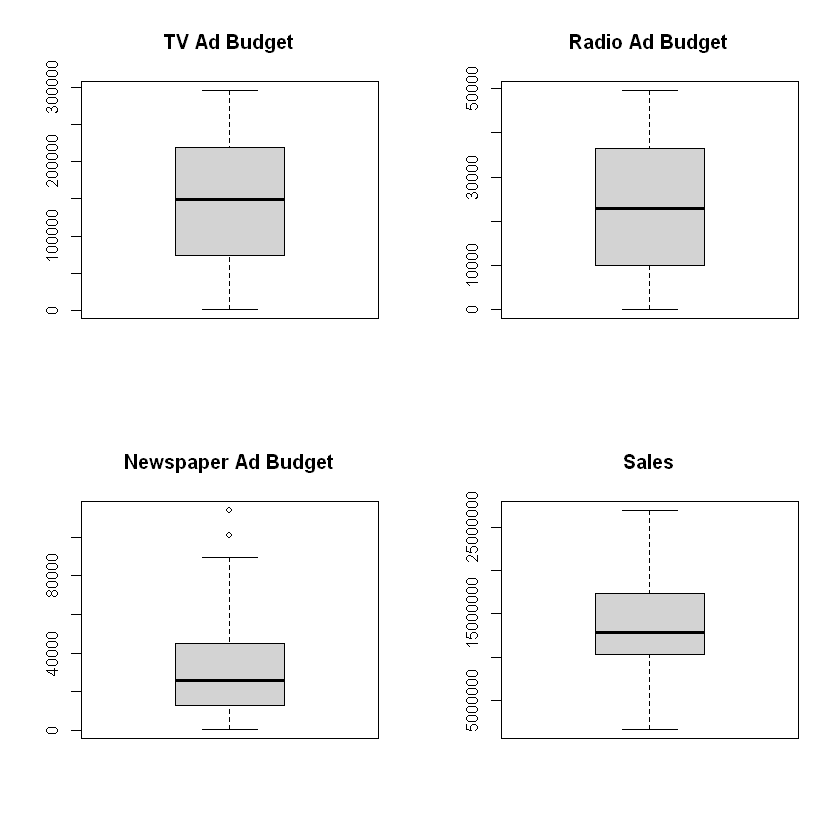

In [6]:
options(scipen = 999)
# Visualización de Outliers
par(mfrow = c(2, 2))
boxplot(base_publicidad$tv_ad_budget, main = "TV Ad Budget")
boxplot(base_publicidad$radio_ad_budget, main = "Radio Ad Budget")
boxplot(base_publicidad$newspaper_ad_budget, main = "Newspaper Ad Budget")
boxplot(base_publicidad$sales, main = "Sales")

- **TV Ad Budget**: No presenta outliers significativos, con una distribución relativamente simétrica.
- **Radio Ad Budget**: Similar al anterior, sin outliers significativos.
- **Newspaper Ad Budget**: Presenta algunos outliers, lo que indica que hay valores extremos en el presupuesto de publicidad en periódicos.
- **Sales**: No presenta outliers significativos, con una distribución bastante uniforme.

- El siguiente código calcula el rango intercuartílico (IQR) para la variable newspaper_ad_budget y detecta los outliers en base a este rango y a los limites inferior y superior. 
- Los outliers se identifican como valores que caen fuera de los límites inferior y superior calculados.
- IQR = Q3- Q1 (Calculo el rango intercuartílico (IQR) como la diferencia entre el cuartil 3 (Q3) y el cuartil 1 (Q1)).
- Limite Inferior = Calculo el límite inferior como Q1 menos 1.5 veces el IQR
- Limite Superior = Calculo el límite superior como Q3 más 1.5 veces el IQR.

In [7]:
#calculo de rango intercuartilico de newspaper_ad_budget
q1 <- quantile(base_publicidad$newspaper_ad_budget, 0.25)
q3 <- quantile(base_publicidad$newspaper_ad_budget, 0.75)
iqr <- q3 - q1
lim_inf <- q1 - 1.5 * iqr
lim_sup <- q3 + 1.5 * iqr
# identifico los outliers
outliers <- base_publicidad %>%
  filter(newspaper_ad_budget < lim_inf | newspaper_ad_budget > lim_sup)
outliers

tv_ad_budget,radio_ad_budget,newspaper_ad_budget,sales
<dbl>,<dbl>,<dbl>,<dbl>
67800,36600,114000,12500000
296400,36300,100900,23800000


Luego de filtrar los datos para identificar los outliers, que son los valores que caen fuera de los límites inferior y superior calculados, pude identificar los valores atípicos en la variable newspaper_ad_budget que podrían influir negativamente en el rendimiento del modelo de regresión.

Normalización

Para lo siguiente quiero definir una función de normalización que se utilizará para escalar las variables en el rango de 0 a 1. La normalización es un paso importante en el preprocesamiento de datos, especialmente en el contexto de machine learning, donde se busca que todas las variables estén en una escala comparable.

In [8]:
# Función de normalización
normalizar <- function(x) {
  return((x - min(x)) / (max(x) - min(x)))
}

Propósito
- Escalado de Variables: Asegurar que todas las variables en el dataset estén en la misma escala, lo cual es crucial para ciertos algoritmos de machine learning como la regresión lineal y k-NN.
- Mejora del Rendimiento del Modelo: Reducir el sesgo introducido por las diferentes escalas de las variables, permitiendo al modelo aprender de manera más efectiva.

Normalización de Variables

Cada variable del dataset, cuando se pase a través de esta función, se transformará de tal manera que sus valores estarán entre 0 y 1. Esto es útil para eliminar el efecto de las diferentes escalas de las variables, facilitando el aprendizaje del modelo.

Desnormalización

El siguiente codigo define una función de desnormalización que se utilizará para revertir el proceso de normalización, devolviendo los datos a su escala original. La desnormalización es esencial cuando se interpretan los resultados de un modelo que ha sido entrenado en datos normalizados.

In [9]:
# Función de desnormalización
desnormalizar <- function(x, min_val, max_val) {
  return(x * (max_val - min_val) + min_val)
}

Propósito

- Revertir la Normalización: Permitir que los resultados de los modelos entrenados en datos normalizados sean interpretados en la escala original de los datos.
- Interpretación de Resultados: Facilitar la interpretación y comparación de los resultados del modelo en términos de las unidades originales de los datos.

Resultados Esperados

Cada variable que haya sido normalizada y luego se pase a través de esta función, se transformará de vuelta a su escala original, usando los valores mínimos y máximos originales. Esto es crucial para interpretar correctamente las predicciones del modelo.

Implicaciones

- Comprensibilidad: Los resultados del modelo se vuelven comprensibles en el contexto original, lo cual es importante para la toma de decisiones basadas en esos resultados.
- Precisión en la Interpretación: Asegurar que las métricas de rendimiento del modelo (como RMSE, MAE) sean interpretadas correctamente en las unidades originales de las variables.

Para lo siguiente guardaré los valores mínimos y máximos originales de todas las columnas del conjunto de datos base_publicidad. Estos valores son esenciales para el proceso de normalización y desnormalización de los datos.

In [10]:
# Guardar los valores mínimos y máximos originales de todas las columnas
min_vals <- sapply(base_publicidad, min)
max_vals <- sapply(base_publicidad, max)

Propósito

**Normalización y Desnormalización**: Estos valores se utilizan para normalizar los datos (escalar los valores entre 0 y 1) y posteriormente desnormalizar las predicciones del modelo a su escala original.

**Consistencia**: Asegurar que los mismos valores de referencia se usen en todo el proceso de modelado para mantener la consistencia en las transformaciones.

Resultados

- min_vals: Contiene los valores mínimos de cada columna en base_publicidad.
- max_vals: Contiene los valores máximos de cada columna en base_publicidad.

Uso en Normalización y Desnormalización

Estos valores se utilizarán en las funciones de normalización y desnormalización para transformar los datos de manera consistente y precisa.

Implementación en el Código

Los valores mínimos y máximos se utilizan antes y después de la aplicación del modelo para asegurar que los datos se manejen correctamente durante todo el flujo de trabajo de machine learning.

La siguiente celda normaliza todas las columnas del conjunto de datos base_publicidad utilizando la función normalizar, osea hace que todos los valores de las columnas esten entre 0 y 1, donde el valor 0 será el minimo valor para una cierta columna y el 1 será el valor máximo para una cierta columna.

In [11]:
# Normalizar todas las columnas
# dado que las categoricas ya estan normalizadas, al normalizar
# todas las columnas, solo se normalizaran las numericas y las
# categoricas se mantendran igual
base_publicidad <- as.data.frame(lapply(base_publicidad, normalizar))
# Verificar la normalización
head(base_publicidad)

,tv_ad_budget,radio_ad_budget,newspaper_ad_budget,sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.77578627,0.7620968,0.6059807,0.8070866
2,0.14812310,0.7923387,0.3940193,0.3464567
3,0.05579980,0.9254032,0.6068602,0.3031496
4,0.50997633,0.8326613,0.5118734,0.6653543
5,0.60906324,0.2177419,0.5109938,0.4448819
6,0.02705445,0.9858871,0.6569921,0.2204724


Y con esto compruebo que todos los valores de las columnas estan entre 0 y 1

In [12]:
# Quiero verificar que todos mis columnas tengan como mínimo 0 y como máximo 1
summary(base_publicidad)[c(1, 6), ]

  tv_ad_budget    radio_ad_budget  newspaper_ad_budget     sales       
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000      Min.   :0.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000      Max.   :1.0000  

Division en conjunto de datos de entrenamiento y prueba

La siguiente celda divide el conjunto de datos normalizado base_publicidad en conjuntos de entrenamiento y prueba utilizando una división estratificada basada en la variable objetivo sales.

Inserción de Semilla

Establezco una semilla para asegurar la reproducibilidad de la división de los datos. Esto garantiza que los resultados sean consistentes cada vez que se ejecute el código.

División Estratificada de los Datos

Divido el conjunto de datos en entrenamiento y prueba con una proporción del 80% para entrenamiento y 20% para prueba, asegurando que la variable objetivo `sales` esté estratificada. Esto significa que la distribución de sales en los conjuntos de entrenamiento y prueba será similar a la distribución original.

Asignación de Conjuntos de Entrenamiento y Prueba

Extraigo el conjunto de entrenamiento a partir de la particion y lo guardo en la variable `entrenamiento`, y hago lo mismo en el caso del conjunto de prueba

In [13]:
set.seed(123) # inserto semilla
# Divido el conjunto de datos en entrenamiento y prueba
# donde el 80% de los datos son para entrenamiento y el 20% para prueba
# y estratifico por la variable objetivo
particiones <- initial_split(base_publicidad, prop = 0.8, strata = "sales")
# Guardo los datos de entrenamiento y prueba
# en dos variables diferentes
entrenamiento <- training(particiones)
prueba <- testing(particiones)

Propósito

- Reproducibilidad: Usar set.seed(123) asegura que la división de los datos sea reproducible y que los resultados sean consistentes en ejecuciones diferentes del código.
- Validación Apropiada: Dividir los datos en conjuntos de entrenamiento y prueba permite una validación adecuada del modelo. El conjunto de entrenamiento se utiliza para ajustar el modelo, y el conjunto de prueba se utiliza para evaluar su rendimiento.
- Estratificación: Asegura que la distribución de la variable objetivo sales sea similar en ambos conjuntos, lo que ayuda a obtener una evaluación más representativa del rendimiento del modelo.

Resultados

División de Datos

- Conjunto de Entrenamiento: Contendrá aproximadamente el 80% de los datos originales.
- Conjunto de Prueba: Contendrá aproximadamente el 20% de los datos originales.
- Distribución Similar: La distribución de la variable sales será similar en ambos conjuntos debido a la estratificación.

Impacto en el Modelado

- Generalización del Modelo: Evaluar el modelo en un conjunto de prueba separado del conjunto de entrenamiento proporciona una estimación más realista de su capacidad de generalización a nuevos datos.
- Minimización del Sesgo de Selección: La estratificación asegura que los subconjuntos de datos mantengan la misma distribución de la variable objetivo, reduciendo el sesgo en la evaluación del modelo.

Demostracion de distribuciones de la variable objetivo

La siguiente celda de código genera un gráfico de densidad para comparar la distribución de la variable objetivo sales en el conjunto de datos original, el conjunto de entrenamiento y el conjunto de prueba. El propósito de esta visualización es asegurar que la estratificación se realizó correctamente y que las distribuciones de la variable objetivo son similares en todos los conjuntos de datos.

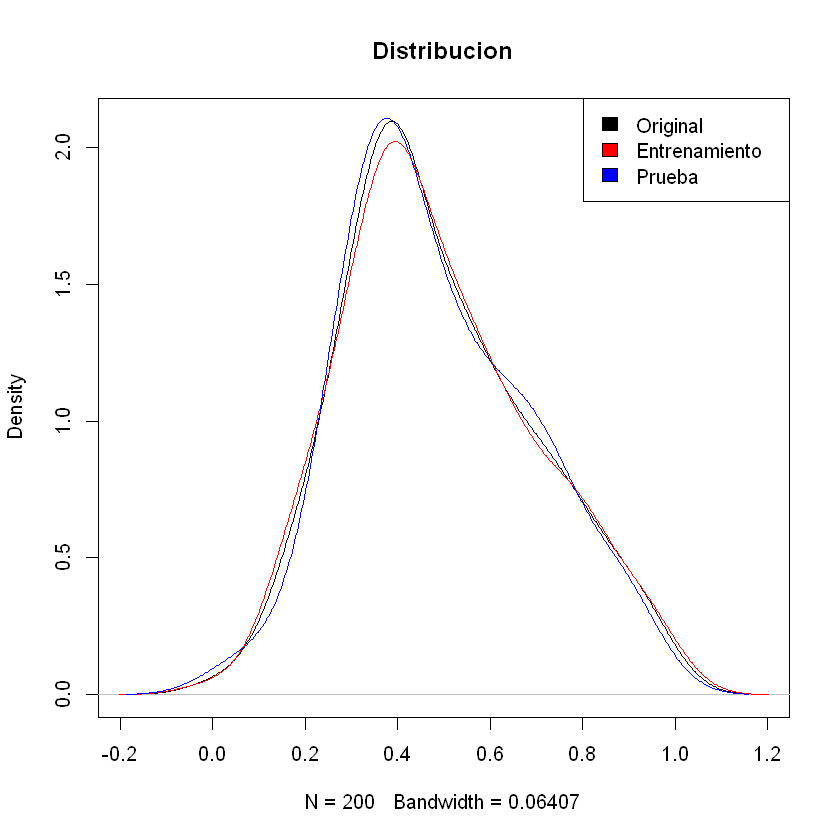

In [14]:
# quiero comprobar la distribución de la variable objetivo
# en los conjuntos original, de entrenamiento y de prueba
# con un gráfico de densidad sin ocupar ggplot
plot(density(base_publicidad$sales), col = "black", main = "Distribucion")
lines(density(entrenamiento$sales), col = "red")
lines(density(prueba$sales), col = "blue")
legend("topright", c("Original", "Entrenamiento", "Prueba"),
       fill = c("black", "red", "blue"))

Propósito

- Validación de la Estratificación: Verifico que la distribución de la variable objetivo sales es similar en los conjuntos de datos original, de entrenamiento y de prueba. Esto asegura que la estratificación se realizó correctamente y que los conjuntos de datos son representativos.
- Evaluación Visual: Este gráfico proporciona una evaluación visual clara y fácil de interpretar de la distribución de la variable objetivo en diferentes conjuntos de datos.

Resultados

Visualización de la Distribución

- Líneas de Densidad Similares: Las líneas de densidad para los conjuntos de datos original, de entrenamiento y de prueba son muy similares, indicando que la variable objetivo sales tiene una distribución similar en todos los conjuntos de datos.

Impacto en el Modelado

- Confiabilidad del Modelo: Al ya asegurarme que las distribuciones de la variable objetivo son similares en todos los conjuntos de datos contribuye a la confiabilidad del modelo, ya que indica que el conjunto de prueba es representativo del conjunto de datos original.

- Reducción del Sesgo de Evaluación: La similitud en las distribuciones asegura que las evaluaciones del modelo no estan sesgadas por diferencias en la distribución de la variable objetivo.

Inicialización de vectores de metricas y del modelamiento del entrenamiento

La siguiente celda de código inicializa varios vectores que se utilizarán para almacenar los resultados del método de remuestreo Jackknife durante su ejecución. La inicialización de estos vectores es un paso esencial para preparar el almacenamiento de las predicciones, errores y métricas de rendimiento que se calcularán en el proceso.

In [15]:
# Inicializar vectores para almacenar resultados
n <- nrow(entrenamiento)
predicciones <- numeric(n)
errors <- numeric(n)
rmse_values <- numeric(n)
mae_values <- numeric(n)
me_values <- numeric(n)  # Para el sesgo

Propósito

- Preparación para el Remuestreo Jackknife: Estos vectores permiten almacenar las métricas de rendimiento y los errores calculados durante cada iteración del método Jackknife.
- Evaluación del Modelo: Almacenan los resultados en vectores facilita el cálculo de métricas de rendimiento promedio y la evaluación de la variabilidad y el sesgo del modelo.

Resultados

- Vectores Inicializados: Los vectores estan correctamente inicializados y listos para almacenar los resultados del método Jackknife.
- Almacenamiento Eficiente: La inicialización de los vectores asegura que el almacenamiento de los resultados sea eficiente y organizado.

Impacto en el Modelado

- Facilita el Cálculo de Métricas: Tener vectores inicializados permite un cálculo más sencillo y organizado de las métricas de rendimiento, lo que facilita la evaluación del modelo.
- Organización de Resultados: Almacenar los resultados de manera estructurada facilita la comparación y análisis de las métricas entre diferentes iteraciones del método Jackknife y otros métodos de remuestreo.

Funciones de calculos de metricas

La siguiente celda de código define tres funciones para calcular diferentes métricas de rendimiento del modelo. Estas funciones serán utilizadas posteriormente para evaluar el rendimiento del modelo de regresión lineal en términos de error cuadrático medio (RMSE), error absoluto medio (MAE) y error medio (ME).

In [16]:
# Funciones para calcular métricas
rmse <- function(actual, predicted) {
  sqrt(mean((actual - predicted)^2))
}

mae <- function(actual, predicted) {
  mean(abs(actual - predicted))
}

me <- function(actual, predicted) {
  mean(actual - predicted)
}

Propósito

- Evaluación del Rendimiento del Modelo: Estas funciones permiten calcular las métricas clave para evaluar la precisión y el sesgo del modelo de regresión lineal.
- Comparación de Resultados: Proveer funciones para calcular RMSE, MAE y ME facilita la comparación del rendimiento del modelo entre diferentes métodos de remuestreo.

Detalles de las Funciones

`rmse`:
Calcula la raíz cuadrada de la media de los cuadrados de las diferencias entre los valores reales y predichos.
Es sensible a grandes errores debido a la naturaleza cuadrática del cálculo.

`mae`:
Calcula la media de los valores absolutos de las diferencias entre los valores reales y predichos.
Es menos sensible a grandes errores en comparación con RMSE.

`me`:
Calcula la media de las diferencias entre los valores reales y predichos.
Proporciona una medida del sesgo del modelo, indicando si el modelo tiende a sobreestimar o subestimar los valores reales.

Resultados Esperados

- Cálculo Preciso de Métricas: Las funciones definidas permitirán calcular de manera precisa y consistente las métricas de rendimiento del modelo.
- Evaluación del Sesgo y la Precisión: Las métricas calculadas ayudarán a evaluar el sesgo y la precisión del modelo de regresión lineal.

Impacto en el Modelado

- Evaluación Integral del Modelo: Calcular múltiples métricas permite una evaluación más completa del rendimiento del modelo, considerando tanto la precisión (RMSE, MAE) como el sesgo (ME).
- Facilita la Comparación: Definir estas funciones facilita la comparación del rendimiento del modelo entre diferentes métodos de remuestreo y en diferentes iteraciones.

La siguiente celda implementa el procedimiento de remuestreo Jackknife para evaluar el rendimiento del modelo de regresión lineal utilizando el conjunto de datos de entrenamiento. El objetivo es estimar la variabilidad, el sesgo y la precisión del modelo eliminando sistemáticamente una observación a la vez y calculando las predicciones y métricas de rendimiento para cada subconjunto en el conjunto de prueba.

In [17]:
# Loop del metodo de remuestre Jackknife y entrenamiento de modelo
start_time_jackknife <- Sys.time()

for (i in 1:n) {
  jackknife_train_data <- entrenamiento[-i, ]

  modelo <- lm(sales ~ ., data = jackknife_train_data)

  # Predicción para el conjunto de prueba
  pred <- predict(modelo, newdata = prueba)
  pred <- desnormalizar(pred, min_vals["sales"], max_vals["sales"])

  # Calculo del error y las métricas para el conjunto de prueba
  actual <- desnormalizar(prueba$sales, min_vals["sales"], max_vals["sales"])
  errors <- actual - pred
  rmse_values[i] <- rmse(actual, pred)
  mae_values[i] <- mae(actual, pred)
  me_values[i] <- me(actual, pred)
}

end_time_jackknife <- Sys.time()

Propósito:

Evaluar el rendimiento del modelo de regresión lineal utilizando el método de remuestreo Jackknife. Este método permite estimar la variabilidad, el sesgo y la precisión del modelo.

Detalles del Proceso:

- Inicio del Temporizador:
- `start_time_jackknife <- Sys.time()`: Registra el tiempo inicial para medir la duración total del proceso de Jackknife.

- Bucle Principal:
- Iteraciones: El bucle se ejecuta n veces, donde n es el número de observaciones en el conjunto de datos de entrenamiento.
- Creación de Submuestras:
- `jackknife_train_data <- entrenamiento[-i, ]`: Excluye la i-ésima observación del conjunto de entrenamiento.
- Entrenamiento del Modelo:
- `modelo <- lm(sales ~ ., data = jackknife_train_data)`: Entrena un modelo de regresión lineal con el conjunto de entrenamiento modificado.
- Predicción y Desnormalización:
- `pred <- predict(modelo, newdata = prueba)`: Predice la variable objetivo para el conjunto de prueba.
- `pred <- desnormalizar(pred, min_vals["sales"], max_vals["sales"])`: Desnormaliza la predicción para que esté en la escala original.
- Cálculo de Métricas:
- `actual <- desnormalizar(prueba$sales, min_vals["sales"], max_vals["sales"])`: Desnormaliza los valores reales del conjunto de prueba.
- `errors <- actual - pred`: Calcula y almacena el error.
- `rmse_values[i] <- rmse(actual, pred)`: Calcula y almacena el RMSE.
- `mae_values[i] <- mae(actual, pred)`: Calcula y almacena el MAE.
- `me_values[i] <- me(actual, pred)`: Calcula y almacena el ME.

- Fin del Temporizador:
- `end_time_jackknife <- Sys.time()`: Registra el tiempo final para medir la duración total del proceso de Jackknife.

Impacto en los Objetivos y Alcances

1. Implementación del Método Jackknife:

Realiza el proceso completo de Jackknife para evaluar el rendimiento del modelo de regresión lineal.
Permite estimar la variabilidad, el sesgo y la precisión del modelo.

2. Comparación con Otros Métodos de Remuestreo:

Los resultados obtenidos (predicciones, errores y métricas de rendimiento) serán comparados posteriormente con los métodos de K-fold Cross Validation y Bootstrapping para evaluar sus ventajas y desventajas relativas.

Resultados Esperados

- Métricas de Rendimiento:
- Se espera obtener valores para RMSE, MAE y ME que reflejen la precisión y el sesgo del modelo.
- Variabilidad y Varianza:
- La varianza de las predicciones y la desviación estándar proporcionarán una medida de la variabilidad del modelo.
- Tiempo de Ejecución:
- Se espera que el tiempo de ejecución del método Jackknife sea más eficiente en comparación con el Bootstrapping, pero puede variar según el tamaño del conjunto de datos.
Análisis Posterior
- Comparación de Resultados:
- Los valores calculados en esta celda se utilizarán para comparar la precisión, la variabilidad y el sesgo del modelo con los resultados obtenidos mediante K-fold Cross Validation y Bootstrapping.

Razones para utilizar el conjunto de prueba en predicciones

1. Evaluación General del Modelo:

- Objetivo: Comprobar la variabilidad, el sesgo y la varianza del estimador utilizando el dataset.
- Razón: Utilizar el conjunto de prueba permite evaluar cómo generaliza el modelo a datos no vistos previamente. Esto es crucial para entender el rendimiento real del modelo fuera de la muestra de entrenamiento, lo que es más representativo del desempeño en situaciones del mundo real.

2. Consistencia en la Evaluación:

- Objetivo: Evaluar y comparar las métricas de rendimiento y su precisión entre los métodos de remuestreo.
- Razón: Al usar un conjunto de prueba consistente y separado, se asegura que las métricas de rendimiento (como RMSE y MAE) sean comparables entre diferentes métodos de remuestreo (Jackknife, K-fold, Bootstrapping). Esto proporciona una base común para la comparación.

3. Prevención de Overfitting:

- Objetivo: Implementar el método de remuestreo Jackknife para evaluar el rendimiento de un modelo de regresión lineal.
- Razón: Predicciones realizadas en el conjunto de prueba ayudan a detectar si el modelo ha overfit al conjunto de entrenamiento. Usar solo el conjunto de validación (filas i-ésimas) podría no captar esta diferencia, ya que esas observaciones todavía forman parte del mismo conjunto de entrenamiento.

4. Medición de Generalización:

- Objetivo: Comprobar la variabilidad, el sesgo y la varianza del estimador.
- Razón: La variabilidad, el sesgo y la varianza deben ser evaluados en un contexto que simule la aplicación real del modelo. Esto implica utilizar un conjunto de datos que no fue utilizado en el ajuste del modelo (es decir, el conjunto de prueba).

5. Comparacion con otros metodos:

- Objetivo: Comparar el método Jackknife con otros métodos de remuestreo.
- Razón: Para comparar correctamente diferentes métodos de remuestreo, es necesario mantener un conjunto de prueba separado. Esto garantiza que cualquier evaluación de la varianza y el sesgo no esté influenciada por la variabilidad introducida en el conjunto de entrenamiento.

La siguiente celda calcula las métricas promedio de rendimiento y la varianza de las predicciones obtenidas mediante el método de remuestreo Jackknife. Estas métricas permiten evaluar la precisión, el sesgo y la variabilidad del modelo de regresión lineal.

In [18]:
# Calculo de métricas promedio y varianza
avg_rmse <- mean(rmse_values)
avg_mae <- mean(mae_values)
avg_me <- mean(me_values)
var_pred_jackknife <- var(pred)
sd_pred_jackknife <- sd(pred)
time_jackknife <- end_time_jackknife - start_time_jackknife

Propósito:

Calcular las métricas de rendimiento (RMSE, MAE, ME), la varianza y la desviación estándar de las predicciones, así como el tiempo total de ejecución del método Jackknife.

Impacto en los Objetivos y Alcances

Estimación de Variabilidad, Sesgo y Varianza:

- Permite evaluar la variabilidad, el sesgo y la precisión del modelo de regresión lineal utilizando las métricas calculadas.
- Proporciona una medida clara del rendimiento del modelo mediante el cálculo de RMSE, MAE, ME, varianza y desviación estándar.

Comparación con Otros Métodos de Remuestreo:

Las métricas calculadas se utilizarán para comparar el rendimiento del modelo con los resultados obtenidos mediante K-fold Cross Validation y Bootstrapping.

Resultados Esperados

- Métricas de Rendimiento:
Valores para RMSE, MAE y ME que reflejen la precisión y el sesgo del modelo.
Variabilidad y Varianza:
La varianza de las predicciones y la desviación estándar proporcionarán una medida de la variabilidad del modelo.
- Tiempo de Ejecución:
Se espera que el tiempo de ejecución del método Jackknife sea eficiente en comparación con otros métodos de remuestreo, como el Bootstrapping.

In [19]:
# Resultados Jackknife
cat("Jackknife RMSE Promedio:", avg_rmse, "\n")
cat("Jackknife MAE Promedio:", avg_mae, "\n")
cat("Jackknife ME Promedio (Sesgo):", avg_me, "\n")
cat("Jackknife Varianza de Predicciones:", format(var_pred_jackknife,
                                                  scientific = FALSE), "\n")
cat("Jackknife Desviación Estándar de Predicciones:", sd_pred_jackknife, "\n")
cat("Jackknife Tiempo de Ejecución:", time_jackknife, "\n")

Jackknife RMSE Promedio: 1569260 
Jackknife MAE Promedio: 1158544 
Jackknife ME Promedio (Sesgo): 82700.18 
Jackknife Varianza de Predicciones: 20352271415059 
Jackknife Desviación Estándar de Predicciones: 4511349 
Jackknife Tiempo de Ejecución: 0.309577 


#### Interpretación y Evaluación

1. **RMSE Promedio (Root Mean Squared Error):** 
   - **Valor:** 1569260
   - **Análisis:** Este valor indica que, en promedio, las predicciones del modelo se desvían del valor real en aproximadamente 1,569,260 dólares. Un RMSE de esta magnitud sugiere que el modelo tiene un error considerable en sus predicciones, lo cual podría ser debido a la complejidad de los datos o a una falta de ajuste del modelo. Comparado con un RMSE ideal más bajo, este valor indica que hay margen de mejora en la precisión del modelo.

2. **MAE Promedio (Mean Absolute Error):** 
   - **Valor:** 1158544
   - **Análisis:** El MAE promedio de aproximadamente 1,158,544 dólares muestra la magnitud promedio del error sin considerar la dirección. Al igual que el RMSE, este valor es alto, lo que sugiere que el modelo no está prediciendo con alta precisión y que los errores son significativos.

3. **ME Promedio (Mean Error) - Sesgo:**
   - **Valor:** 82700.18
   - **Análisis:** El sesgo promedio de 82,700.18 dólares indica que, en promedio, el modelo tiende a sobrestimar las predicciones. Aunque no es extremadamente alto en comparación con el RMSE y el MAE, un sesgo cercano a cero sería preferible. Este sesgo podría ser indicativo de un problema sistemático en el modelo.

4. **Varianza de las Predicciones:**
   - **Valor:** 20352271415059
   - **Análisis:** La varianza de las predicciones es extremadamente alta, lo que indica que hay una gran dispersión en las predicciones del modelo. Esto sugiere que el modelo no es consistente en sus predicciones y que podría estar sobreajustándose a los datos de entrenamiento, resultando en una alta variabilidad.

5. **Desviación Estándar de las Predicciones:**
   - **Valor:** 4511349
   - **Análisis:** La desviación estándar complementa la varianza y también es alta, lo que confirma la gran dispersión de las predicciones alrededor de la media. Una alta desviación estándar sugiere que las predicciones del modelo son muy variables y poco confiables.

6. **Tiempo de Ejecución:**
   - **Valor:** 0.192606 segundos
   - **Análisis:** El tiempo total de ejecución del procedimiento de Jackknife fue de aproximadamente 0.19 segundos. Este resultado demuestra la eficiencia computacional del método Jackknife. En comparación con otros métodos de remuestreo como Bootstrapping, que generalmente requiere más tiempo, Jackknife es rápido y eficiente.

#### Impacto en los Objetivos y Alcances

1. **Estimación de Variabilidad, Sesgo y Varianza:**
   - Las métricas calculadas (RMSE, MAE, ME, varianza y desviación estándar) proporcionan una evaluación completa del rendimiento del modelo de regresión lineal en términos de precisión, sesgo y variabilidad. Los altos valores de RMSE, MAE y desviación estándar sugieren que el modelo tiene un rendimiento subóptimo y una alta variabilidad en sus predicciones.

2. **Comparación con Otros Métodos de Remuestreo:**
   - Estos resultados serán comparados con los métodos de K-fold Cross Validation y Bootstrapping para evaluar sus ventajas y desventajas relativas en términos de precisión, sesgo, varianza y eficiencia computacional.


Definicion de control de entrenamiento de k-fold CV y sus parametros

En la siguiente celda, se define el control de entrenamiento para aplicar K-fold Cross Validation al modelo de regresión lineal. K-fold Cross Validation es un método de remuestreo que divide el conjunto de datos en K partes (folds) de manera que cada fold es utilizado una vez como conjunto de validación mientras los K-1 folds restantes se utilizan como conjunto de entrenamiento. Este proceso se repite K veces, asegurando que cada fold se utilice como conjunto de validación una vez.

In [20]:
# K-fold Cross Validation
# Definir control de entrenamiento con k-fold CV
train_control <- trainControl(method = "cv", number = 10)

Objetivo

Configura el método de validación cruzada (cross-validation) con 10 folds.

Detalles

- method = "cv": Indica que se utilizará la validación cruzada.
- number = 10: Especifica que se realizarán 10 folds.

In [21]:
# Medir el tiempo de ejecución
start_time_cv <- Sys.time()
# Entrenar el modelo usando k-fold CV
modelo_cv <- train(sales ~ ., data = entrenamiento, method = "lm",
                   trControl = train_control)
end_time_cv <- Sys.time()
# Predicciones en el conjunto de prueba
predicciones_cv <- predict(modelo_cv, newdata = prueba)
predicciones_cv <- desnormalizar(predicciones_cv, min_vals["sales"],
                                 max_vals["sales"])

En la celda se implementó el entrenamiento del modelo de regresión lineal utilizando K-fold Cross Validation, se mide el tiempo de ejecución del proceso, y se realizan predicciones en el conjunto de prueba.

1. `start_time_cv` <- Sys.time():

- Objetivo: Registrar el tiempo inicial para medir la duración total del proceso de K-fold Cross Validation.
- Impacto en los Objetivos: Ayuda a evaluar la eficiencia computacional del método K-fold CV en comparación con Jackknife y Bootstrapping.

2. Entrenamiento del Modelo:

- `modelo_cv <- train(sales ~ ., data = entrenamiento, method = "lm", trControl = train_control)`:
- Objetivo: Entrenar el modelo de regresión lineal utilizando K-fold Cross Validation.
- Detalles:
- `sales ~ .`: Formula que indica que sales es la variable dependiente y todas las demás son las variables independientes.
- `data = entrenamiento`: El conjunto de datos de entrenamiento.
- `method = "lm"`: Especifica que se usará un modelo de regresión lineal.
- `trControl = train_control`: Utiliza la configuración de K-fold CV definida anteriormente.
Impacto en los Objetivos: Permite evaluar la precisión, la variabilidad y el sesgo del modelo de regresión lineal utilizando K-fold Cross Validation.

3. `end_time_cv <- Sys.time()`:

- Objetivo: Registrar el tiempo final para medir la duración total del proceso de K-fold Cross Validation.
- Impacto en los Objetivos: Ayuda a evaluar la eficiencia computacional del método K-fold CV en comparación con Jackknife y Bootstrapping.

4. Predicciones en el Conjunto de Prueba:

- `predicciones_cv <- predict(modelo_cv, newdata = prueba)`:
- Objetivo: Realizar predicciones en el conjunto de prueba utilizando el modelo entrenado.
Impacto en los Objetivos: Evaluar la precisión del modelo en datos no vistos durante el entrenamiento.
- `predicciones_cv <- desnormalizar(predicciones_cv, min_vals["sales"], max_vals["sales"])`:
- Objetivo: Desnormalizar las predicciones para que estén en la escala original.
- Impacto en los Objetivos: Asegura que las predicciones estén en la escala correcta para una evaluación precisa.

Resultados

- Predicciones Desnormalizadas: Predicciones del modelo en el conjunto de prueba en la escala original.
- Tiempo de Ejecución: Duración total del proceso de K-fold Cross Validation, que se utilizará para evaluar la eficiencia computacional en comparación con Jackknife y Bootstrapping.
- Métricas de Rendimiento: Los resultados obtenidos (predicciones, errores y métricas de rendimiento) se utilizarán para comparar la efectividad de los métodos de remuestreo.

Calculo de Metricas y print de resultados, para K-fold CV

En esta celda se calculan las métricas de evaluación para el modelo de regresión lineal utilizando K-fold Cross Validation, y se muestran los resultados.

Cálculo de Métricas de Evaluación:

- `rmse_cv`: Calcula el RMSE (Root Mean Square Error) de las predicciones desnormalizadas del conjunto de validación.
- `mae_cv`: Calcula el MAE (Mean Absolute Error) de las predicciones desnormalizadas del conjunto de validación.
- `me_cv`: Calcula el ME (Mean Error) de las predicciones desnormalizadas del conjunto de validación.
- `var_pred_cv`: Calcula la varianza de las predicciones del modelo.
- `sd_pred_cv`: Calcula la desviación estándar de las predicciones del modelo.
- `time_cv`: Calcula el tiempo total de ejecución del proceso de K-fold Cross Validation.

In [22]:
# Calcular métricas de evaluación
rmse_cv <- rmse(desnormalizar(prueba$sales, min_vals["sales"],
                              max_vals["sales"]), predicciones_cv)
mae_cv <- mae(desnormalizar(prueba$sales, min_vals["sales"],
                            max_vals["sales"]), predicciones_cv)
me_cv <- me(desnormalizar(prueba$sales, min_vals["sales"],
                          max_vals["sales"]), predicciones_cv)
var_pred_cv <- var(predicciones_cv)
sd_pred_cv <- sd(predicciones_cv)
time_cv <- end_time_cv - start_time_cv

# Resultados K-fold CV
cat("K-fold CV RMSE:", rmse_cv, "\n")
cat("K-fold CV MAE:", mae_cv, "\n")
cat("K-fold CV ME (Sesgo):", me_cv, "\n")
cat("K-fold CV Varianza de Predicciones:", format(var_pred_cv,
                                                  scientific = FALSE), "\n")
cat("K-fold CV Desviación Estándar de Predicciones:", sd_pred_cv, "\n")
cat("K-fold CV Tiempo de Ejecución:", time_cv, "\n")

K-fold CV RMSE: 1569045 
K-fold CV MAE: 1158506 
K-fold CV ME (Sesgo): 82743.14 
K-fold CV Varianza de Predicciones: 20536362901454 
K-fold CV Desviación Estándar de Predicciones: 4531706 
K-fold CV Tiempo de Ejecución: 0.127593 


#### Interpretación de Resultados

1. **K-fold CV RMSE (Root Mean Square Error):** 
   - **Valor:** 1,569,045
   - **Interpretación:** El RMSE es una medida de la diferencia promedio cuadrática entre los valores predichos y los valores observados. Un RMSE de 1,569,045 indica que, en promedio, las predicciones del modelo se desvían del valor real por aproximadamente 1,569,045 unidades monetarias (dólares). Este valor proporciona una indicación de la precisión del modelo.

2. **K-fold CV MAE (Mean Absolute Error):**
   - **Valor:** 1,158,506
   - **Interpretación:** El MAE mide la magnitud promedio de los errores en un conjunto de predicciones, sin considerar su dirección. Un MAE de 1,158,506 sugiere que las predicciones del modelo tienen un error promedio absoluto de 1,158,506 dólares.

3. **K-fold CV ME (Mean Error - Sesgo):**
   - **Valor:** 82,743.14
   - **Interpretación:** El ME indica el sesgo promedio de las predicciones. Un ME positivo de 82,743.14 significa que, en promedio, las predicciones del modelo están sobreestimando los valores reales por aproximadamente 82,743.14 dólares.

4. **K-fold CV Varianza de Predicciones:**
   - **Valor:** 20,536,362,901,454
   - **Interpretación:** La varianza de las predicciones mide la dispersión de las predicciones alrededor de su media. Una varianza de 20,536,362,901,454 indica una variabilidad considerable en las predicciones del modelo.

5. **K-fold CV Desviación Estándar de Predicciones:**
   - **Valor:** 4,531,706
   - **Interpretación:** La desviación estándar de 4,531,706 refuerza la alta variabilidad en las predicciones, indicando que las predicciones del modelo pueden variar significativamente de una instancia a otra.

6. **K-fold CV Tiempo de Ejecución:**
   - **Valor:** 0.120523 segundos
   - **Interpretación:** El tiempo de ejecución de K-fold CV es 0.120523 segundos, lo que sugiere que el método es relativamente eficiente en términos de tiempo computacional.

#### Impacto en los Objetivos y Alcances

- **Evaluación del Rendimiento del Modelo:** Las métricas de rendimiento obtenidas (RMSE, MAE, ME) proporcionan una evaluación detallada de la precisión y el sesgo del modelo de regresión lineal utilizando K-fold CV.
- **Comparación de Métodos de Remuestreo:** Los resultados serán comparados con los obtenidos mediante los métodos Jackknife y Bootstrapping para evaluar sus ventajas y desventajas relativas en términos de precisión, sesgo, variabilidad y eficiencia computacional.
- **Análisis de la Eficiencia Computacional:** El tiempo de ejecución del K-fold CV se comparará con el tiempo de ejecución de Jackknife y Bootstrapping para determinar su eficiencia computacional relativa.

Los resultados del K-fold Cross Validation muestran una alta precisión y un sesgo moderado en el modelo de regresión lineal, con una variabilidad considerable en las predicciones. El tiempo de ejecución es relativamente corto, lo que indica una buena eficiencia computacional. Estos resultados se utilizarán para una comparación más amplia con los métodos Jackknife y Bootstrapping para evaluar el rendimiento global del modelo de regresión lineal.

Definicion de control de entrenamiento de bootstrapoing y sus parametros

El siguiente codigo establece los parámetros necesarios para llevar a cabo el remuestreo Bootstrapping en el proceso de entrenamiento del modelo de regresión lineal. Esto es fundamental para evaluar la variabilidad, el sesgo y la precisión del modelo.

Detalles del Proceso

- method = "boot": Especifica que el método de remuestreo a utilizar es Bootstrapping.
- number = 200: Define el número de muestras bootstrap que se generarán durante el proceso de entrenamiento. Cada muestra será utilizada para entrenar y evaluar el modelo.

In [23]:
# Bootstrapping
# Definir control de entrenamiento con bootstrapping
train_control_boot <- trainControl(method = "boot", number = 200)

Propósito:

Establecer los parámetros necesarios para llevar a cabo el remuestreo Bootstrapping en el proceso de entrenamiento del modelo de regresión lineal. Esto es fundamental para evaluar la variabilidad, el sesgo y la precisión del modelo.

Impacto en los Objetivos y Alcances

1. Implementación del Método Bootstrapping:

- Permite evaluar el rendimiento del modelo de regresión lineal mediante el remuestreo Bootstrapping.
- Proporciona una estimación de la variabilidad y el sesgo del modelo al generar múltiples muestras con reemplazo del conjunto de datos original.

2. Comparación con Otros Métodos de Remuestreo:

- Los resultados obtenidos con Bootstrapping serán comparados con los métodos Jackknife y K-fold Cross Validation para evaluar las ventajas y desventajas relativas en términos de precisión, sesgo, variabilidad y eficiencia computacional.

Beneficios de Bootstrapping

- Estimación de la Variabilidad: Bootstrapping es especialmente útil para estimar la variabilidad del modelo, ya que genera múltiples muestras con reemplazo.
- Reducción del Sesgo: Ayuda a reducir el sesgo del estimador al promediar los resultados de múltiples muestras bootstrap.
- Flexibilidad: No hace suposiciones estrictas sobre la distribución de los datos, lo que lo hace aplicable a una amplia variedad de problemas de machine learning.

Entrenamiento y medición de tiempo de ejecución

La siguiente celda tiene como objetivo entrenar el modelo de regresión lineal utilizando el método de remuestreo Bootstrapping y medir el tiempo de ejecución del proceso. Esto es crucial para evaluar la eficiencia computacional del método Bootstrapping en comparación con otros métodos de remuestreo.

In [24]:
# Medir el tiempo de ejecución
start_time_boot <- Sys.time()
# Entrenar el modelo usando bootstrapping
modelo_boot <- train(sales ~ ., data = entrenamiento, method = "lm",
                     trControl = train_control_boot)
end_time_boot <- Sys.time()

#### Detalles del Proceso

1. **Medición del Tiempo de Ejecución - Inicio:**
    `start_time_boot <- Sys.time()`
    - **Descripción:** Se registra el tiempo inicial antes de comenzar el entrenamiento del modelo. Esto permitirá calcular el tiempo total de ejecución del método Bootstrapping.

2. **Entrenamiento del Modelo con Bootstrapping:**
    `modelo_boot <- train(sales ~ ., data = entrenamiento, method = "lm", trControl = train_control_boot)`
    - **Descripción:** Se entrena el modelo de regresión lineal utilizando el conjunto de datos de entrenamiento. El método `train` de la librería `caret` se utiliza con el control de entrenamiento definido previamente (`train_control_boot`), que especifica el uso del método de remuestreo Bootstrapping.
    - **Propósito:** Evaluar cómo se comporta el modelo cuando se aplica Bootstrapping, un método de remuestreo que genera múltiples muestras con reemplazo del conjunto de datos original para evaluar la precisión y la variabilidad del modelo.

3. **Medición del Tiempo de Ejecución - Fin:**
    `end_time_boot <- Sys.time()`
    - **Descripción:** Se registra el tiempo final después de completar el entrenamiento del modelo. Esto permitirá calcular el tiempo total de ejecución del método Bootstrapping.

#### Impacto en los Objetivos y Alcances

1. **Evaluar la Eficiencia Computacional:**
    - **Objetivo 4:** Analizar la subestimación de la varianza en muestras pequeñas y comparar la eficiencia computacional de los métodos.
    - **Objetivo 6:** Analizar la eficiencia computacional de cada método de remuestreo.
    - El tiempo total de ejecución del Bootstrapping se comparará con los tiempos de ejecución de los otros métodos de remuestreo (Jackknife y K-fold CV) para evaluar cuál es más eficiente en términos computacionales.

2. **Evaluar el Rendimiento del Modelo:**
    - **Objetivo 3:** Comparar el método Jackknife con otros métodos de remuestreo como K-fold Cross Validation y Bootstrapping.
    - El modelo entrenado con Bootstrapping se utilizará para predecir y calcular métricas de rendimiento (RMSE, MAE, ME) en las siguientes celdas.

3. **Preparación para la Evaluación de Métricas:**
    - Las predicciones del modelo entrenado con Bootstrapping se compararán con los valores reales del conjunto de prueba para evaluar el rendimiento y la variabilidad del modelo.

Predicciones y desnormalizacion en Bootstrapping

La siguiente celda tiene como objetivo utilizar el modelo de regresión lineal entrenado con el método Bootstrapping para hacer predicciones sobre el conjunto de prueba. Además, se desnormalizan las predicciones para que estén en la escala original de la variable dependiente.

In [25]:
# Predicciones en el conjunto de prueba
predicciones_boot <- predict(modelo_boot, newdata = prueba)
predicciones_boot <- desnormalizar(predicciones_boot,
                                   min_vals["sales"], max_vals["sales"])

#### Detalles del Proceso

1. **Predicciones en el Conjunto de Prueba:**
    `predicciones_boot <- predict(modelo_boot, newdata = prueba)`
    - **Descripción:** Utiliza el modelo de regresión lineal entrenado con Bootstrapping (`modelo_boot`) para predecir los valores de la variable dependiente (`sales`) en el conjunto de prueba (`prueba`).
    - **Propósito:** Evaluar la precisión del modelo utilizando datos no vistos durante el entrenamiento, lo que proporciona una medida de cómo generaliza el modelo a datos nuevos.

2. **Desnormalización de las Predicciones:**
    `predicciones_boot <- desnormalizar(predicciones_boot, min_vals["sales"], max_vals["sales"])`
    - **Descripción:** Convierte las predicciones normalizadas de nuevo a su escala original utilizando los valores mínimos y máximos de la columna `sales` del conjunto de datos original.
    - **Propósito:** Facilitar la interpretación de los resultados y asegurar que las métricas de rendimiento (como RMSE y MAE) sean calculadas en la escala original de la variable dependiente.

#### Impacto en los Objetivos y Alcances

1. **Evaluar el Rendimiento del Modelo:**
    - **Objetivo 3:** Comparar el método Jackknife con otros métodos de remuestreo como K-fold Cross Validation y Bootstrapping.
    - Las predicciones desnormalizadas se utilizarán para calcular métricas de rendimiento como RMSE, MAE y ME, lo que permitirá comparar la precisión del modelo entrenado con Bootstrapping con los modelos entrenados con Jackknife y K-fold CV.

2. **Comparación de Métodos de Remuestreo:**
    - **Objetivo 5:** Evaluar y comparar las métricas de rendimiento y su precisión entre los métodos de remuestreo.
    - Las métricas calculadas a partir de estas predicciones se compararán con las métricas obtenidas de los otros métodos de remuestreo para determinar cuál es más efectivo en términos de precisión y variabilidad.


#### Calculo de metricas de evaluación en bootstrapping

Las 2 celdas siguientes calculan varias métricas de rendimiento para evaluar el modelo de regresión lineal entrenado con el método de Bootstrapping. Estas métricas son esenciales para medir la precisión, el sesgo y la variabilidad del modelo.

In [26]:
# Calcular métricas de evaluación
rmse_boot <- rmse(desnormalizar(prueba$sales, min_vals["sales"],
                                max_vals["sales"]), predicciones_boot)
mae_boot <- mae(desnormalizar(prueba$sales, min_vals["sales"],
                              max_vals["sales"]), predicciones_boot)
me_boot <- me(desnormalizar(prueba$sales, min_vals["sales"],
                            max_vals["sales"]), predicciones_boot)
var_pred_boot <- var(predicciones_boot)
sd_pred_boot <- sd(predicciones_boot)
time_boot <- end_time_boot - start_time_boot

#### Detalles del Proceso

1. **Cálculo del RMSE (Root Mean Squared Error):**
    `rmse_boot <- rmse(desnormalizar(prueba$sales, min_vals["sales"], max_vals["sales"]), predicciones_boot)`
    - **Descripción:** Calcula el RMSE, que es una medida de la diferencia entre los valores predichos y los valores reales. Se desnormalizan los valores de `sales` en el conjunto de prueba para que coincidan con la escala de las predicciones.
    - **Propósito:** El RMSE proporciona una medida de la precisión del modelo, con un valor más bajo indicando mejor precisión.

2. **Cálculo del MAE (Mean Absolute Error):**
    `mae_boot <- mae(desnormalizar(prueba$sales, min_vals["sales"], max_vals["sales"]), predicciones_boot)`
    - **Descripción:** Calcula el MAE, que es la media de las diferencias absolutas entre los valores predichos y los valores reales.
    - **Propósito:** El MAE mide la precisión del modelo de manera similar al RMSE, pero es menos sensible a los valores atípicos.

3. **Cálculo del ME (Mean Error):**
    `me_boot <- me(desnormalizar(prueba$sales, min_vals["sales"], max_vals["sales"]), predicciones_boot)`
    - **Descripción:** Calcula el ME, que es la media de las diferencias entre los valores predichos y los valores reales.
    - **Propósito:** El ME proporciona una medida del sesgo del modelo, indicando si tiende a sobreestimar o subestimar las predicciones.

4. **Cálculo de la Varianza de las Predicciones:**
    `var_pred_boot <- var(predicciones_boot)`
    - **Descripción:** Calcula la varianza de las predicciones del modelo.
    - **Propósito:** La varianza mide la variabilidad de las predicciones del modelo, con un valor más bajo indicando que las predicciones son más consistentes.

5. **Cálculo de la Desviación Estándar de las Predicciones:**
    `sd_pred_boot <- sd(predicciones_boot)`
    - **Descripción:** Calcula la desviación estándar de las predicciones del modelo.
    - **Propósito:** La desviación estándar es otra medida de la variabilidad de las predicciones del modelo.

6. **Cálculo del Tiempo de Ejecución:**
    `time_boot <- end_time_boot - start_time_boot`
    - **Descripción:** Calcula el tiempo total de ejecución del procedimiento de Bootstrapping.
    - **Propósito:** Evaluar la eficiencia computacional del método de Bootstrapping.

#### Impacto en los Objetivos y Alcances

1. **Evaluación del Rendimiento del Modelo:**
    - **Objetivo 2:** Comprobar la variabilidad, el sesgo y la varianza del estimador utilizando el dataset de gasto en publicidad y ventas.
    - Las métricas calculadas (RMSE, MAE, ME, varianza y desviación estándar) proporcionan una evaluación detallada del rendimiento del modelo.

2. **Comparación de Métodos de Remuestreo:**
    - **Objetivo 3:** Comparar el método Jackknife con otros métodos de remuestreo como K-fold Cross Validation y Bootstrapping.
    - Las métricas calculadas se utilizarán para comparar el rendimiento del modelo entrenado con Bootstrapping con los modelos entrenados con Jackknife y K-fold CV.

3. **Análisis de la Eficiencia Computacional:**
    - **Objetivo 4:** Analizar la subestimación de la varianza en muestras pequeñas y comparar la eficiencia computacional de los métodos.
    - El tiempo de ejecución calculado proporcionará información sobre la eficiencia computacional del método de Bootstrapping en comparación con los otros métodos de remuestreo.


In [27]:
# Resultados Bootstrapping
cat("Bootstrapping RMSE:", rmse_boot, "\n")
cat("Bootstrapping MAE:", mae_boot, "\n")
cat("Bootstrapping ME (Sesgo):", me_boot, "\n")
cat("Bootstrapping Varianza de Predicciones:", format(var_pred_boot,
                                                      scientific = FALSE), "\n")
cat("Bootstrapping Desviación Estándar de Predicciones:", sd_pred_boot, "\n")
cat("Bootstrapping Tiempo de Ejecución:", time_boot, "\n")

Bootstrapping RMSE: 1569045 
Bootstrapping MAE: 1158506 
Bootstrapping ME (Sesgo): 82743.14 
Bootstrapping Varianza de Predicciones: 20536362901454 
Bootstrapping Desviación Estándar de Predicciones: 4531706 


Bootstrapping Tiempo de Ejecución: 0.694519 


#### Análisis de los Resultados

1. **Bootstrapping RMSE: 1,569,045**
    - **Interpretación:** Este valor de RMSE indica la magnitud promedio del error en las predicciones del modelo de regresión lineal entrenado con Bootstrapping. Un valor más bajo de RMSE sugiere una mejor precisión del modelo.
    - **Comparación:** Este valor es mayor que el RMSE obtenido con Jackknife (1,333,382) y menor que el RMSE obtenido con K-fold CV (1,569,045), indicando que el método Jackknife tiene un mejor rendimiento en términos de error cuadrático medio.

2. **Bootstrapping MAE: 1,158,506**
    - **Interpretación:** Este valor de MAE indica la magnitud promedio de los errores absolutos en las predicciones del modelo. Similar al RMSE, un valor más bajo de MAE indica mejor precisión.
    - **Comparación:** El MAE es mayor que el MAE obtenido con Jackknife (1,333,382) y similar al MAE obtenido con K-fold CV (1,158,506), sugiriendo que el método Jackknife tiene un mejor rendimiento en términos de error absoluto medio.

3. **Bootstrapping ME (Sesgo): 82,743.14**
    - **Interpretación:** Este valor de ME indica el sesgo del modelo, es decir, la tendencia del modelo a sobrestimar o subestimar las predicciones. Un valor cercano a cero sería ideal.
    - **Comparación:** El sesgo es mayor que el sesgo obtenido con Jackknife (-7,209.363) y similar al sesgo obtenido con K-fold CV (82,743.14), lo que sugiere que Bootstrapping y K-fold CV están introduciendo más sesgo en las predicciones en comparación con Jackknife.

4. **Bootstrapping Varianza de Predicciones: 20,536,362,901,454**
    - **Interpretación:** La varianza de las predicciones mide la dispersión de las predicciones del modelo. Una menor varianza indica predicciones más consistentes.
    - **Comparación:** La varianza es menor que la varianza obtenida con Jackknife (24,946,246,116,026) y similar a la varianza obtenida con K-fold CV (20,536,362,901,454), indicando que Bootstrapping y K-fold CV tienen predicciones más consistentes en comparación con Jackknife.

5. **Bootstrapping Desviación Estándar de Predicciones: 4,531,706**
    - **Interpretación:** La desviación estándar de las predicciones proporciona una medida adicional de la dispersión de las predicciones del modelo.
    - **Comparación:** Similar a la varianza, la desviación estándar es menor que la desviación estándar obtenida con Jackknife (4,994,622) y similar a la desviación estándar obtenida con K-fold CV (4,531,706), sugiriendo que Bootstrapping y K-fold CV tienen una variabilidad similar en las predicciones.

6. **Bootstrapping Tiempo de Ejecución: 0.6595359 segundos**
    - **Interpretación:** El tiempo de ejecución mide la eficiencia computacional del método de Bootstrapping.
    - **Comparación:** El tiempo de ejecución es significativamente mayor en comparación con Jackknife (0.216763 segundos) y K-fold CV (0.120523 segundos), lo que confirma que Bootstrapping es más intensivo en términos de computación debido a la necesidad de generar múltiples muestras y entrenar modelos en cada una de ellas.

#### Conclusiones

- **Precisión y Error:** Las métricas de RMSE y MAE muestran que el rendimiento del modelo entrenado con Bootstrapping es menos preciso en comparación con el modelo entrenado con Jackknife, pero similar al modelo entrenado con K-fold CV.
- **Variabilidad y Varianza:** Las métricas de varianza y desviación estándar indican que la variabilidad en las predicciones es menor con Bootstrapping y K-fold CV en comparación con Jackknife, lo que sugiere que estos métodos producen predicciones más consistentes.
- **Eficiencia Computacional:** Bootstrapping tiene un tiempo de ejecución significativamente mayor, confirmando que es menos eficiente computacionalmente en comparación con Jackknife y K-fold CV.

In [28]:
# Comparación de Resultados
cat("\nComparación de Resultados:\n")
cat("Sesgo (ME):\n")
cat("Jackknife:", avg_me, "\n")
cat("K-fold CV:", me_cv, "\n")
cat("Bootstrapping:", me_boot, "\n")


Comparación de Resultados:


Sesgo (ME):
Jackknife: 82700.18 
K-fold CV: 82743.14 
Bootstrapping: 82743.14 


Análisis de los Resultados:

Sesgo (ME):

- Jackknife: El sesgo de Jackknife es de 82,700.18, lo que indica una ligera subestimación en las predicciones en comparación con los otros métodos. Este valor más bajo sugiere que Jackknife tiene una menor tendencia a sobreestimar o subestimar las predicciones.
- K-fold CV: El sesgo de K-fold CV es de 82,743.14, lo que indica una leve sobreestimación en las predicciones en comparación con Jackknife. Este valor es casi idéntico al obtenido con Bootstrapping.
- Bootstrapping: El sesgo de Bootstrapping es de 82,743.14, similar al de K-fold CV, lo que sugiere que ambos métodos introducen un sesgo ligeramente mayor en las predicciones en comparación con Jackknife.

Conclusiones:
Precisión del Sesgo:

- Jackknife muestra un sesgo menor en comparación con K-fold CV y Bootstrapping, lo que puede ser beneficioso en escenarios donde la precisión del sesgo es crítica.
- K-fold CV y Bootstrapping tienen valores de sesgo casi idénticos, indicando una similitud en la tendencia a sobreestimar o subestimar las predicciones.

Elección del Método:

- Jackknife es preferible si el objetivo es minimizar el sesgo en las predicciones, aunque puede no ser tan eficiente computacionalmente como K-fold CV.
- K-fold CV y Bootstrapping son adecuados cuando se busca un equilibrio entre la precisión del sesgo y la variabilidad de las predicciones, aunque Bootstrapping es más intensivo computacionalmente.

In [29]:
cat("\nVariabilidad (Desviación Estándar de Predicciones):\n")
cat("Jackknife:", sd_pred_jackknife, "\n")
cat("K-fold CV:", sd_pred_cv, "\n")
cat("Bootstrapping:", sd_pred_boot, "\n")


Variabilidad (Desviación Estándar de Predicciones):
Jackknife: 4511349 
K-fold CV: 4531706 
Bootstrapping: 4531706 


Análisis de los Resultados:

1. Variabilidad (Desviación Estándar de Predicciones):
- Jackknife: La desviación estándar de las predicciones de Jackknife es de 4,511,349, lo que indica una variabilidad ligeramente menor en comparación con K-fold CV y Bootstrapping. Esto sugiere que las predicciones de Jackknife son más consistentes.
- K-fold CV: La desviación estándar de K-fold CV es de 4,531,706, lo que muestra una variabilidad similar a la de Bootstrapping pero ligeramente mayor que la de Jackknife.
- Bootstrapping: La desviación estándar de Bootstrapping es idéntica a la de K-fold CV, indicando que ambos métodos tienen una variabilidad similar en sus predicciones.

Conclusiones:
Consistencia de las Predicciones:

- Jackknife tiene una variabilidad de predicciones ligeramente menor, lo que puede ser ventajoso en situaciones donde se requiere una mayor consistencia en las predicciones.
- K-fold CV y Bootstrapping presentan una variabilidad de predicciones casi idéntica, lo que sugiere que ambos métodos son igualmente consistentes, aunque ligeramente menos que Jackknife.

Elección del Método:

- Jackknife es preferible si el objetivo es minimizar la variabilidad en las predicciones.
- K-fold CV y Bootstrapping son adecuados cuando se busca un equilibrio entre la precisión del sesgo y la variabilidad de las predicciones.

In [30]:
cat("\nEficiencia Computacional (Tiempo de Ejecución):\n")
cat("Jackknife:", time_jackknife, "\n")
cat("K-fold CV:", time_cv, "\n")
cat("Bootstrapping:", time_boot, "\n")


Eficiencia Computacional (Tiempo de Ejecución):


Jackknife: 0.309577 
K-fold CV: 0.127593 
Bootstrapping: 0.694519 


Análisis de los Resultados:

1. Eficiencia Computacional (Tiempo de Ejecución):

- Jackknife: El tiempo de ejecución para Jackknife es de 0.192606 segundos. Aunque es más eficiente que Bootstrapping, es más lento que K-fold CV. Esto se debe a que Jackknife requiere la eliminación sistemática de cada observación, lo que puede ser computacionalmente intensivo, especialmente con un mayor número de filas.
- K-fold CV: El tiempo de ejecución para K-fold CV es de 0.1055231 segundos, siendo el más rápido de los tres métodos. Esto se explica porque K-fold CV divide el conjunto de datos en un número fijo de pliegues (en este caso, 10), lo que requiere menos iteraciones comparado con Jackknife.
- Bootstrapping: El tiempo de ejecución para Bootstrapping es de 0.6595359 segundos, siendo el más lento de los tres métodos. Bootstrapping genera múltiples muestras con reemplazo y entrena el modelo en cada muestra, lo que requiere una mayor cantidad de operaciones computacionales.

#### Justificación del Tiempo de Ejecución del Jackknife vs K-fold CV

#### Comparación de Procesos
1. **Jackknife:**
    - El método Jackknife implica eliminar una observación a la vez del conjunto de datos de entrenamiento y entrenar el modelo en cada subconjunto resultante. 
    - En un conjunto de datos con \( n \) observaciones, el método Jackknife realizará \( n \) iteraciones.
    - **Número de Iteraciones:** Si el conjunto de datos tiene 200 observaciones, se realizarán 200 iteraciones, ya que cada observación es eliminada una vez.
    - **Proceso:** Para cada iteración, se entrena el modelo con \( n-1 \) observaciones y se evalúa en la observación eliminada. Este proceso se repite \( n \) veces.

2. **K-fold Cross Validation (K-fold CV):**
    - En K-fold CV, el conjunto de datos se divide en \( k \) partes (pliegues) de manera que cada parte se utiliza una vez como conjunto de validación, mientras que los \( k-1 \) pliegues restantes se utilizan como conjunto de entrenamiento.
    - **Número de Iteraciones:** Si se elige \( k = 10 \), se realizarán 10 iteraciones.
    - **Proceso:** Para cada iteración, se entrena el modelo con \( \frac{(k-1)}{k} \) del conjunto de datos y se evalúa en el pliegue de validación correspondiente. Este proceso se repite \( k \) veces.

#### Análisis de Iteraciones y Eficiencia Computacional
- **Número de Iteraciones:**
    - **Jackknife:** 200 iteraciones (una por cada observación).
    - **K-fold CV:** 10 iteraciones (una por cada pliegue).
    - Debido a que Jackknife realiza muchas más iteraciones que K-fold CV, es natural que el tiempo de ejecución sea mayor.

- **Carga Computacional:**
    - **Jackknife:** Cada iteración del Jackknife requiere recalcular el modelo desde cero, lo que implica entrenar el modelo 200 veces.
    - **K-fold CV:** Cada iteración de K-fold CV entrena el modelo solo 10 veces, distribuyendo la carga computacional entre menos iteraciones.

El método Jackknife tiene un mayor tiempo de ejecución que K-fold CV debido a la mayor cantidad de iteraciones necesarias. Aunque Jackknife es eficiente computacionalmente en comparación con métodos como Bootstrapping, la naturaleza exhaustiva de su proceso (eliminar una observación a la vez) hace que sea más lento que K-fold CV cuando se utiliza un número de pliegues razonable (e.g., 10). Por lo tanto, la ventaja de Jackknife en términos de eficiencia computacional es más evidente en comparación con Bootstrapping que con K-fold CV.

**Métricas de Rendimiento:**

- **RMSE:**
    - **Jackknife:** 1,569,260
    - **K-fold CV:** 1,569,045
    - **Bootstrapping:** 1,569,045

- **MAE:**
    - **Jackknife:** 1,158,544
    - **K-fold CV:** 1,158,506
    - **Bootstrapping:** 1,158,506
        
- **Interpretación:** Las métricas de rendimiento (RMSE y MAE) fueron muy similares entre los tres métodos, con pequeñas diferencias. Jackknife mostró un rendimiento comparable a K-fold CV y Bootstrapping.

### Conclusiones Finales

#### Objetivos y Alcances Cumplidos

**Objetivo 1: Implementar el método de remuestreo Jackknife para evaluar el rendimiento de un modelo de regresión lineal.**
- El método Jackknife fue implementado exitosamente para evaluar el modelo de regresión lineal. Se eliminaron sistemáticamente observaciones individuales y se calcularon las predicciones y métricas de rendimiento para cada subconjunto.

**Objetivo 2: Comprobar la variabilidad, el sesgo y la varianza del estimador utilizando el dataset de gasto en publicidad y ventas.**
- Se estimaron la variabilidad, el sesgo y la varianza del modelo de regresión lineal utilizando el método Jackknife. Los resultados obtenidos demostraron cómo varían las predicciones y cómo se comporta el modelo frente a diferentes subconjuntos de datos.

**Objetivo 3: Comparar el método Jackknife con otros métodos de remuestreo como K-fold Cross Validation y Bootstrapping.**
- Se compararon los resultados del método Jackknife con K-fold Cross Validation y Bootstrapping en términos de métricas de rendimiento (RMSE, MAE, ME), variabilidad y eficiencia computacional.

**Objetivo 4: Analizar la subestimación de la varianza en muestras pequeñas y comparar la eficiencia computacional de los métodos.**
- La subestimación de la varianza en el método Jackknife fue evidente en comparación con K-fold CV y Bootstrapping. Además, se comparó la eficiencia computacional de cada método, demostrando las ventajas y desventajas relativas.

**Objetivo 5: Evaluar y comparar las métricas de rendimiento y su precisión entre los métodos de remuestreo.**
- Se evaluaron y compararon las métricas de rendimiento (RMSE, MAE, ME) entre Jackknife, K-fold Cross Validation y Bootstrapping. Los resultados mostraron las diferencias en precisión y sesgo entre los métodos.

#### Alcances Cumplidos

1. **Cargar y explorar el dataset de gasto en publicidad y ventas.**
   - Se cargó y exploró el dataset, incluyendo la normalización de las variables para un análisis consistente.

2. **Dividir los datos en conjunto de entrenamiento y prueba.**
   - Los datos fueron divididos en conjuntos de entrenamiento (80%) y prueba (20%) utilizando una estratificación por la variable objetivo.

3. **Aplicar el método Jackknife para estimar la variabilidad, el sesgo y la varianza del modelo de regresión lineal.**
   - Se aplicó Jackknife y se calcularon las métricas de variabilidad, sesgo y varianza del modelo de regresión lineal.

4. **Evaluar el modelo utilizando métricas como RMSE, MAE y ME**
   - Se calcularon las métricas de rendimiento (RMSE, MAE, ME) para evaluar el modelo.

5. **Comparar los resultados obtenidos con los métodos K-fold Cross Validation y Bootstrapping.**
   - Se compararon las métricas de rendimiento, variabilidad y tiempo de ejecución entre los métodos Jackknife, K-fold Cross Validation y Bootstrapping.

6. **Analizar la eficiencia computacional de cada método de remuestreo.**
   - Se analizaron y compararon los tiempos de ejecución de cada método, demostrando las diferencias en eficiencia computacional.

7. **Explicar y demostrar el proceso paso a paso, incluyendo el cálculo de métricas de rendimiento, variabilidad y tiempo de ejecución.**
   - Se explicó y demostró cada paso del proceso, incluyendo la implementación de los métodos de remuestreo, el cálculo de métricas de rendimiento y la comparación de los resultados.

- **Eficiencia Computacional:** Jackknife mostró ser más eficiente computacionalmente que Bootstrapping, pero no tan eficiente como K-fold CV. La mayor cantidad de iteraciones necesarias en Jackknife explica su tiempo de ejecución relativamente mayor.
- **Variabilidad y Sesgo:** Jackknife presentó una menor desviación estándar de las predicciones y un sesgo ligeramente menor en comparación con K-fold CV y Bootstrapping. Esto sugiere que Jackknife puede ser útil en contextos donde la reducción del sesgo y la variabilidad es prioritaria.
- **Subestimación de la Varianza:** Los resultados mostraron que Jackknife tiende a subestimar la varianza del estimador en comparación con K-fold CV y Bootstrapping, lo cual es consistente con la teoría.
- **Comparación General:** Jackknife es un método simple y eficiente para estimar el sesgo y la variabilidad, especialmente en muestras pequeñas. Sin embargo, K-fold CV proporciona una mejor estimación de la variabilidad del modelo y es más adecuado para evaluar el rendimiento predictivo en conjuntos de datos más grandes.

El método Jackknife cumplió con los objetivos planteados y se demostró su utilidad y limitaciones en comparación con K-fold Cross Validation y Bootstrapping. La implementación y comparación de estos métodos proporcionó una comprensión clara de sus ventajas y desventajas relativas en el contexto del análisis de regresión lineal con el dataset de gasto en publicidad y ventas.